In [1]:
#Problem definition - Predict car price to help users list cars for sale

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(3).T

,0,1,2
Make,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series
Year,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0
Engine Cylinders,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


### Notes for self - List of things to do in the next few videos

1. MSRP is the target variable
2. Linear Regression is the model to be used for this project
3. The metric for evaluation is RMSE
4. Understand feature engineering, regularization, EDA

 ## 1. Data Prep

In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### 1.a Fixing column names - convert to one case and fix punctuations, spaces

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
#converting to lower case, removing spaces and replacing that with underscores
df.columns.str.lower().str.replace(' ','_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
#writing the updated column names back to the dataframe
df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
#taking a look at the updated column names
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [10]:
df.head(3).T

,0,1,2
make,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series
year,2011,2011,2011
engine_fuel_type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
engine_hp,335.0,300.0,300.0
engine_cylinders,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL
driven_wheels,rear wheel drive,rear wheel drive,rear wheel drive
number_of_doors,2.0,2.0,2.0
market_category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


### 1.b Fixing columns that have object type values in a similar way - removing spaces, and fixing case

In [11]:
#selecting the 'column names' that contain objects
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [12]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [13]:
for col in strings:
    df[col] = (df[col].str.lower().str.replace(' ',"_"))

In [14]:
df.head(3).T

,0,1,2
make,bmw,bmw,bmw
model,1_series_m,1_series,1_series
year,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0
engine_cylinders,6.0,6.0,6.0
transmission_type,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance"


In [15]:
for col in df.columns:
    print (col)
    print(df[col].nunique())

make
48
model
914
year
28
engine_fuel_type
10
engine_hp
356
engine_cylinders
9
transmission_type
5
driven_wheels
4
number_of_doors
3
market_category
71
vehicle_size
3
vehicle_style
16
highway_mpg
59
city_mpg
69
popularity
48
msrp
6049


In [16]:
for col in df.columns:
    print (col)
    print('______')
    print(df[col].unique()[:3])

make
______
['bmw' 'audi' 'fiat']
model
______
['1_series_m' '1_series' '100']
year
______
[2011 2012 2013]
engine_fuel_type
______
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']
engine_hp
______
[335. 300. 230.]
engine_cylinders
______
[6. 4. 5.]
transmission_type
______
['manual' 'automatic' 'automated_manual']
driven_wheels
______
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']
number_of_doors
______
[2. 4. 3.]
market_category
______
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']
vehicle_size
______
['compact' 'midsize' 'large']
vehicle_style
______
['coupe' 'convertible' 'sedan']
highway_mpg
______
[26 28 27]
city_mpg
______
[19 20 18]
popularity
______
[3916 3105  819]
msrp
______
[46135 40650 36350]


In [17]:
#df.msrp

import seaborn as sns
%matplotlib inline

<AxesSubplot:>

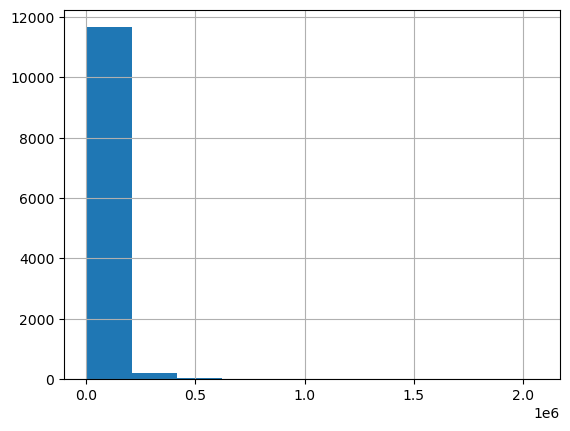

In [18]:
df['msrp'].hist()
#right skewed - maybe use log transformation?


<AxesSubplot:xlabel='msrp', ylabel='Count'>

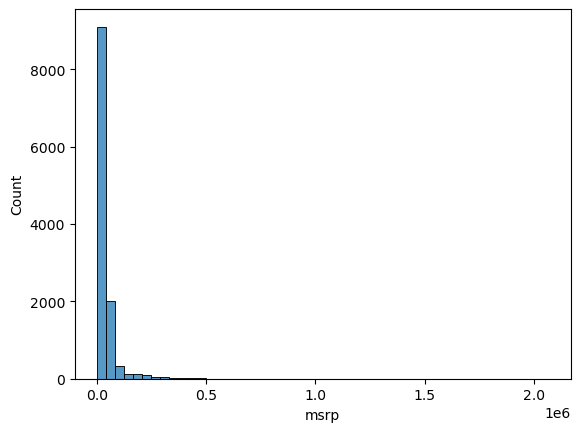

In [19]:
sns.histplot((df.msrp), bins = 50)

In [20]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<AxesSubplot:xlabel='msrp', ylabel='Count'>

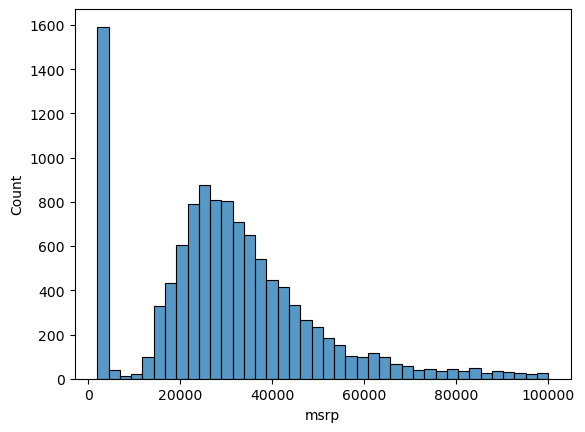

In [21]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 40)
#something weird with the prices (closer to the 2000msrp price point)

In [22]:
np.log([0, 1, 10])

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 2.30258509])

<AxesSubplot:>

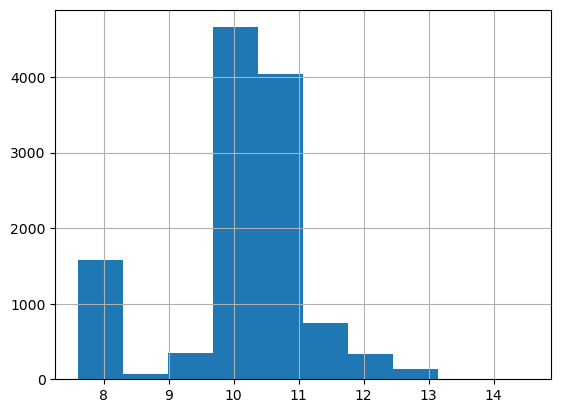

In [23]:
np.log1p(df['msrp']).hist()

<AxesSubplot:xlabel='msrp', ylabel='Count'>

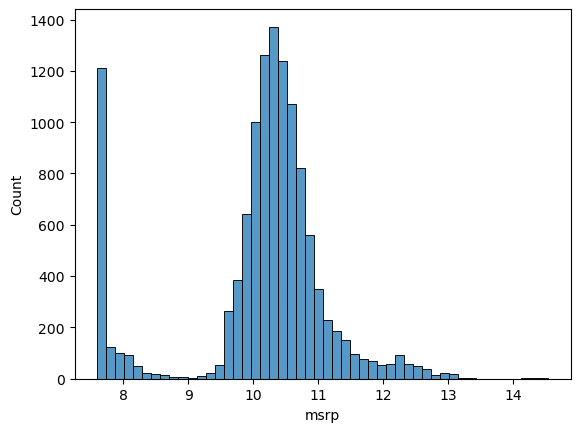

In [24]:
sns.histplot(np.log1p(df['msrp']), bins = 50)

In [25]:
#Missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [26]:
df['market_category']

0        factory_tuner,luxury,high-performance
1                           luxury,performance
2                      luxury,high-performance
3                           luxury,performance
4                                       luxury
                         ...                  
11909               crossover,hatchback,luxury
11910               crossover,hatchback,luxury
11911               crossover,hatchback,luxury
11912               crossover,hatchback,luxury
11913                                   luxury
Name: market_category, Length: 11914, dtype: object

In [27]:
#Summary - data prep and eda - fix column names (case, spaces), and object values in columns. Plot numerical variables
# to figure out distribution and relevant transformations to eliminate skewness

### 2. Validation framework

In [28]:
#train-val-test = 60-20-20 split
n=len(df)

In [29]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = n - (n_val+n_test)

In [30]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [31]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [32]:
df_train = df.iloc[n_train:]

In [33]:
len(df_train)

4764

In [34]:
#Continue from Minute 10:00 - validation framework - shuffling the dataset since there seems to be an order in the df

In [35]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [36]:
df_train.shape, df_val.shape, df_test.shape

((7150, 16), (2382, 16), (2382, 16))

In [37]:
n

11914

In [38]:
idx = np.arange(n)

#set seed
np.random.seed(2)

#shuffling index
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [39]:
#Summary of what was done - Create a list of indices where n = length of dataset, shuffle indices, and then use to 
#randomly sample data for train, val and test sets
#why not use train_test_split from sklearn?

In [40]:
df_train = df_train.reset_index(drop=True)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [41]:
df_val= df_val.reset_index(drop=True)
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [42]:
df_test = df_test.reset_index(drop=True)
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [43]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [44]:
del df_train['msrp']

In [45]:
del df_val['msrp']
del df_test['msrp']

### Linear Regression

used for predicting numbers

g(X) ~ y; g=model, X=feature matrix, y=target

In [46]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [47]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [48]:
# taking engine_hp, city_mpg, and popularity - [453, 11, 86]

In [49]:
def lin_reg(w, x):
    n = len(x)
    
    pred = w0
    
    for i in range(n):
        pred += w[i]*x[i]
        
    return pred

In [50]:
x = [453, 11, 86]
w = [0.01,0.02,0.003]
w0 = 1

In [51]:
lin_reg(w, x)

6.008

In [52]:
np.expm1(6.008)

#Technically we dont have to do the exponent at this stage of the project, primarily because there is no actual training 
#being done that uses the log values of msrp in the model. Hence for all we know, the values we get from the above function
#is the price. 

405.6691680569546

In [53]:
#Summary - So far, we tried to build a linear regression eqn using 1 row and 3 features. This is primarily to calculate
#the target variable and there is no "learning" happening in what was coded above.

### Video 2.6 - Linear Regression Vector Form

In [54]:
#dot product'

def dot(x, w):
    n=len(x)
    
    residual = 0
    
    for i in range(n):
        residual += x[i] *w[i]
        
    return residual

In [55]:
#creating a vectorized form of the function to implement the linear regression equation

def lin_reg(w, x):
    return w0 + dot(x, w)

w is a n+1 dimensional vector, where n is the number of independent variables/features/predictors

In [56]:
w_new = [w0] + w

In [57]:
#boring crap in video 2.6 - 

In [58]:
w0 = 8
w = [0.01, 0.045, 0.255]
w_new = [w0] + w

In [59]:
x1 = [1, 244, 25, 3535]
x2 = [1, 424, 10, 20202]
x3 = [1, 4242, 2424, 22]

In [60]:
x = [x1, x2, x3]
x

[[1, 244, 25, 3535], [1, 424, 10, 20202], [1, 4242, 2424, 22]]

In [61]:
x = np.array(x)
x

array([[    1,   244,    25,  3535],
       [    1,   424,    10, 20202],
       [    1,  4242,  2424,    22]])

In [62]:
np.dot(x, w_new)

array([ 912.99, 5164.2 ,  165.11])

### 2.7 Normal Equation

In [63]:
x1 = [244, 25, 3535]
x2 = [424, 10, 20202]
x3 = [4242, 2424, 22]

In [64]:
x= [ x1, x2, x3]
x= np.array(x)

In [65]:
x

array([[  244,    25,  3535],
       [  424,    10, 20202],
       [ 4242,  2424,    22]])

In [66]:
y = [100,200,300]

In [67]:
#maybe check out elements of statistical learning

In [68]:
def train_linreg(x, y):
    pass
    

In [69]:
xTx = x.T.dot(x)

In [70]:
xTx

array([[ 18233876,  10292948,   9521512],
       [ 10292948,   5876501,    343723],
       [  9521512,    343723, 420617513]])

In [71]:
np.dot(x.T, x)

array([[ 18233876,  10292948,   9521512],
       [ 10292948,   5876501,    343723],
       [  9521512,    343723, 420617513]])

In [72]:
xTx_inv = np.linalg.inv(xTx)

In [73]:
xTx_inv

array([[ 6.18191207e-05, -1.08202208e-04, -1.31097706e-06],
       [-1.08202208e-04,  1.89556853e-04,  2.29446835e-06],
       [-1.31097706e-06,  2.29446835e-06,  3.01790152e-08]])

### the equation that we are trying to implement here is as follows

w = (X'X)".X'.y ; where X'=transpose of X, X" = inverse of X

In [74]:
np.linalg.multi_dot([xTx_inv, x.T, y])

array([ 4.81151034e-01, -7.18253360e-01,  1.57137664e-04])

In [75]:
#appending ones to the feature matrix

In [76]:
ones = np.ones(x.shape[0])

In [77]:
x = np.column_stack([ones, x])

In [78]:
x

array([[1.0000e+00, 2.4400e+02, 2.5000e+01, 3.5350e+03],
       [1.0000e+00, 4.2400e+02, 1.0000e+01, 2.0202e+04],
       [1.0000e+00, 4.2420e+03, 2.4240e+03, 2.2000e+01]])

In [79]:
xTx = x.T.dot(x)
xTx

array([[3.00000000e+00, 4.91000000e+03, 2.45900000e+03, 2.37590000e+04],
       [4.91000000e+03, 1.82338760e+07, 1.02929480e+07, 9.52151200e+06],
       [2.45900000e+03, 1.02929480e+07, 5.87650100e+06, 3.43723000e+05],
       [2.37590000e+04, 9.52151200e+06, 3.43723000e+05, 4.20617513e+08]])

In [80]:
xTx_inv = np.linalg.inv(xTx)

In [81]:
np.linalg.multi_dot([xTx_inv, x.T, y])

array([ 9.600000e+01, -2.500000e-01,  7.500000e-01,  5.859375e-03])

In [82]:
def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    xTx = x.T.dot(x)
    xTx_inv = np.linalg.inv(xTx)
    w_full = np.linalg.multi_dot([xTx_inv, x.T, y])
    
    return w_full[0], w_full[1:]

In [83]:
train_linear_regression(x, y)

(96.0, array([-0.25      ,  0.75      ,  0.00585938]))

#### Recap of what was done:

First we learned how to make predictions using the linear equation with some known/assumed weights

Second, we implemented the linear equation in normal form to learn the parameters.

Ideally, we do the implementation of the linear equation first, find the weights and then use those to make predictions as in step 1 above


everything is dot product, no cross products

### 2.8 car price baseline model

In [84]:
# what are the variables that are non object, ie numerical
df_train.dtypes[df_train.dtypes!="object"].index

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [85]:
base = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity']

In [86]:
#extracting the values of the numerical columns in df_train

X = df_train[base].values

In [87]:
#log1p of the price is in this array
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [88]:
train_linear_regression(X, y_train)

(nan, array([nan, nan, nan, nan, nan, nan]))

<AxesSubplot:>

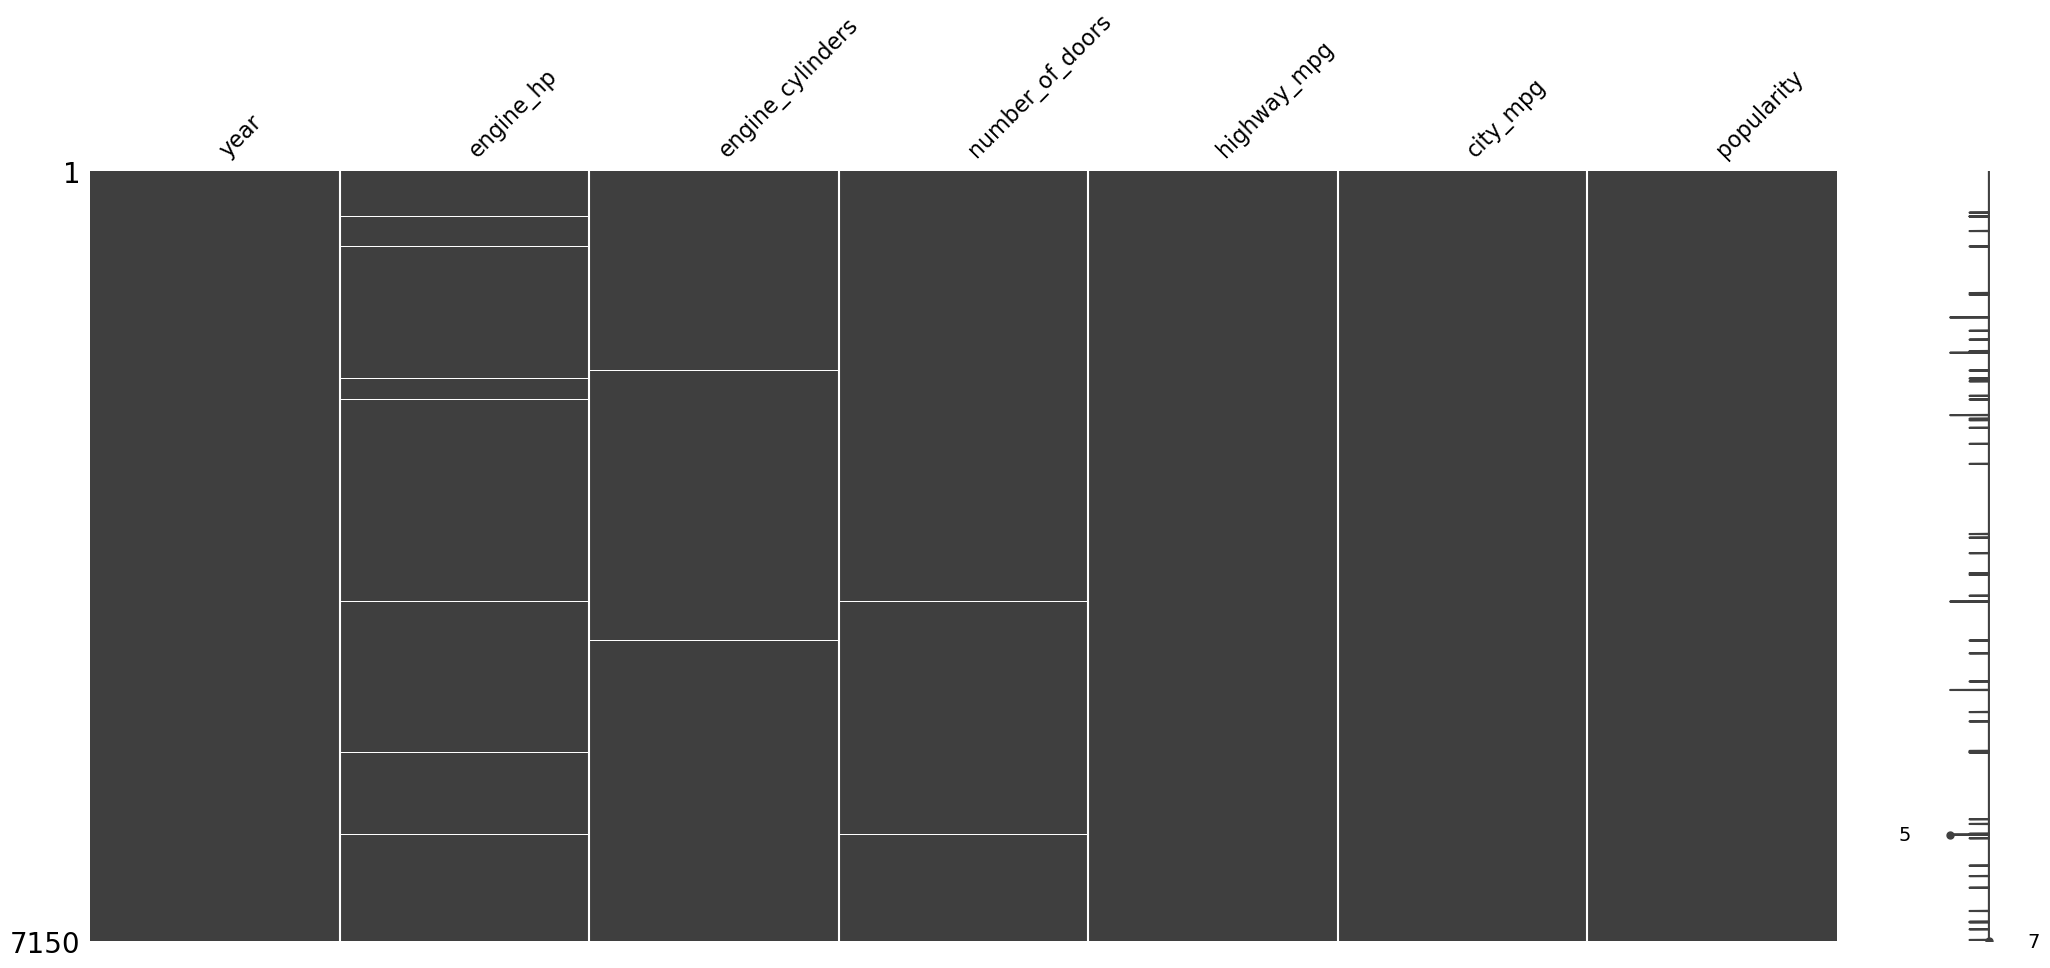

In [89]:
#i like this way of doing missing matrix better than the sns.heatmap
#pip install missingno
import missingno as msno
msno.matrix(df_train[base])

<AxesSubplot:>

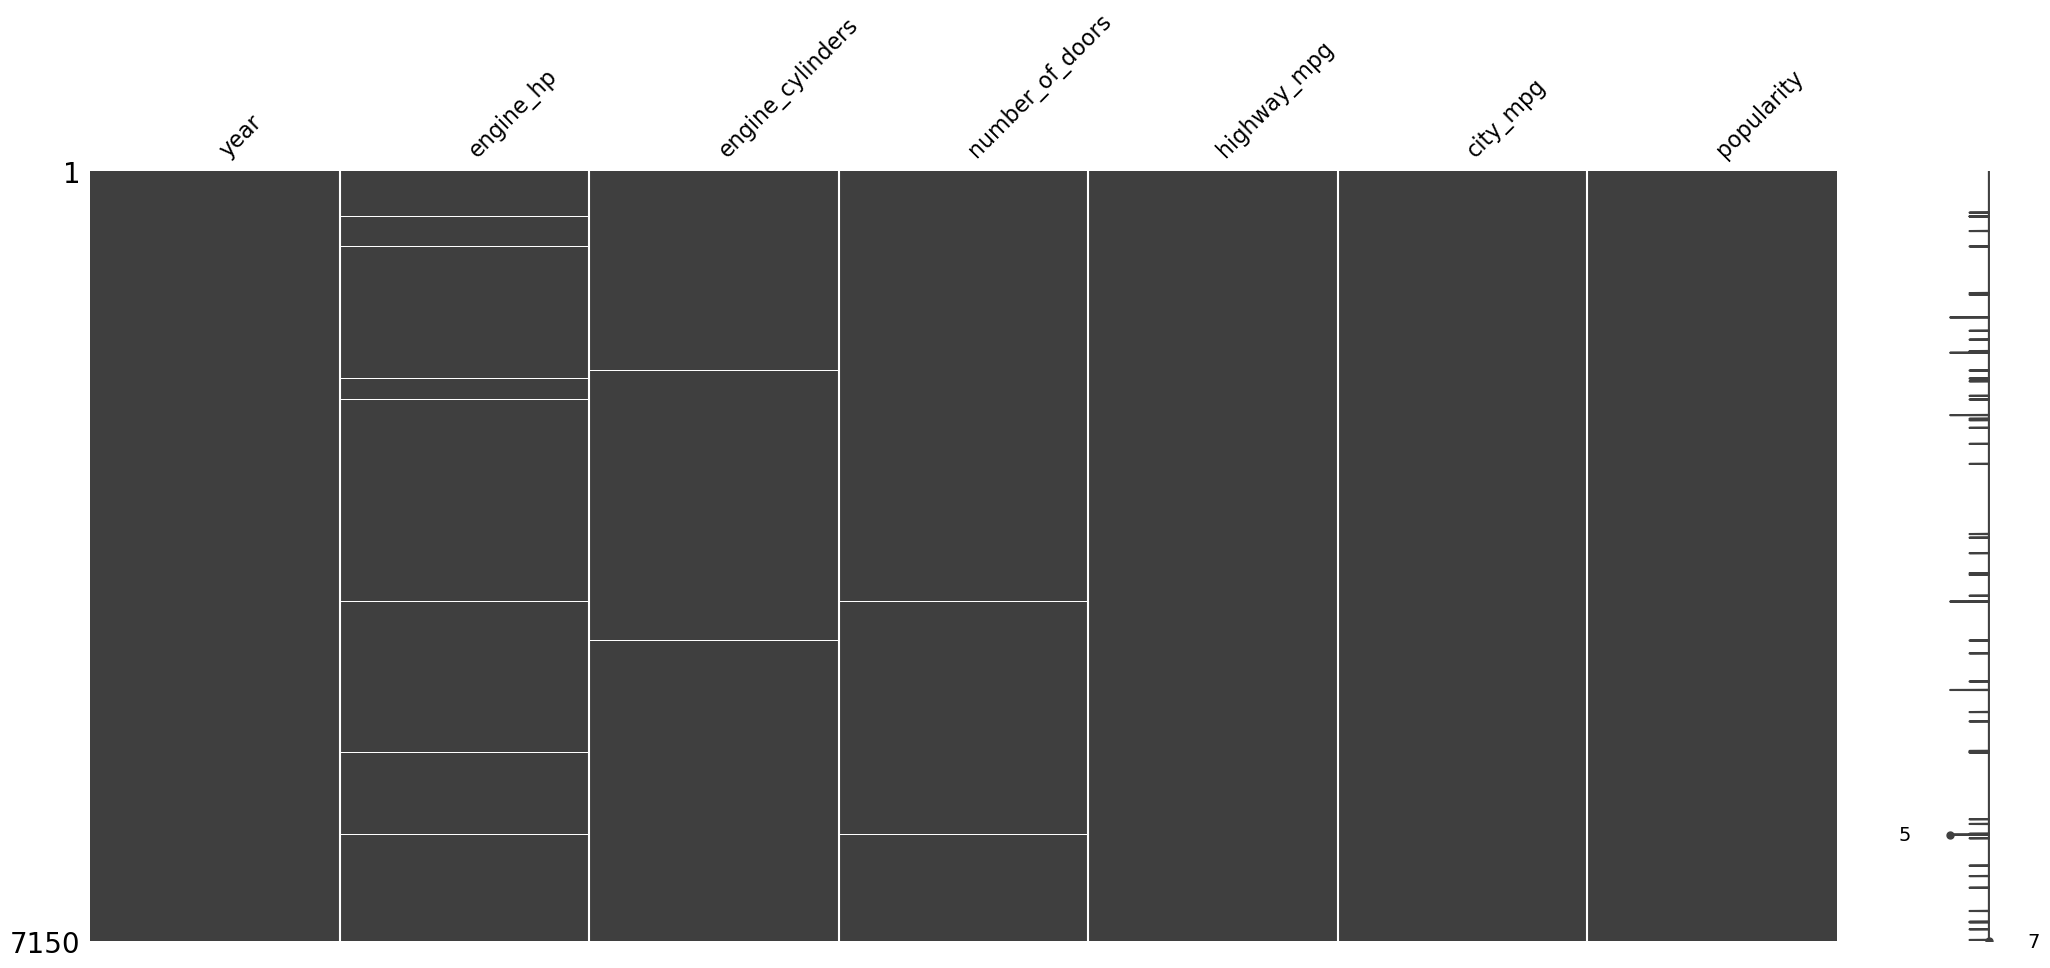

In [90]:
msno.matrix(df_train[base])

In [91]:
df_train[base].isnull().sum()

year                 0
engine_hp           40
engine_cylinders    14
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [92]:
df_train[base].fillna(0).isnull().sum()
#filling the blanks with zero means we are teaching the model to disregard the missing values
#note that this above code does not replace the existing dataframe

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [93]:
x_train = df_train[base].fillna(0).values
#for now we are going to replace the missing values with zeroes

In [94]:
w0, w = train_linear_regression(x_train, y_train)

In [95]:
w

array([ 9.47904876e-03, -1.46568227e-01,  1.69913041e-01,  1.30267631e-02,
        1.39569715e-02, -6.34974935e-06])

In [96]:
x_train

array([[2008.,  148.,    4., ...,   33.,   24., 1385.],
       [2012.,  132.,    4., ...,   32.,   25., 2031.],
       [2016.,  148.,    4., ...,   37.,   28.,  640.],
       ...,
       [2015.,  285.,    6., ...,   22.,   17.,  549.],
       [2014.,  563.,   12., ...,   21.,   13.,   86.],
       [2017.,  200.,    4., ...,   31.,   22.,  873.]])

In [97]:
x_train.shape

(7150, 7)

In [98]:
w

array([ 9.47904876e-03, -1.46568227e-01,  1.69913041e-01,  1.30267631e-02,
        1.39569715e-02, -6.34974935e-06])

In [99]:
def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    x = np.column_stack((ones, x))
    xTx = x.T.dot(x)
    xTx_inv = np.linalg.inv(xTx)
    w_full = np.linalg.multi_dot([xTx_inv, x.T, y])
    
    return w_full[0], w_full[1:]

In [100]:
w0, w = train_linear_regression(x_train, y_train)

In [101]:
w0, w

(-180.8528902550388,
 array([ 9.43209513e-02,  3.80316024e-03,  7.39013429e-02, -2.35246490e-02,
        -2.85786636e-03,  1.10921411e-02, -4.88810772e-05]))

In [102]:
y_pred = w0 + np.dot(x_train, w)

In [103]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

<AxesSubplot:ylabel='Count'>

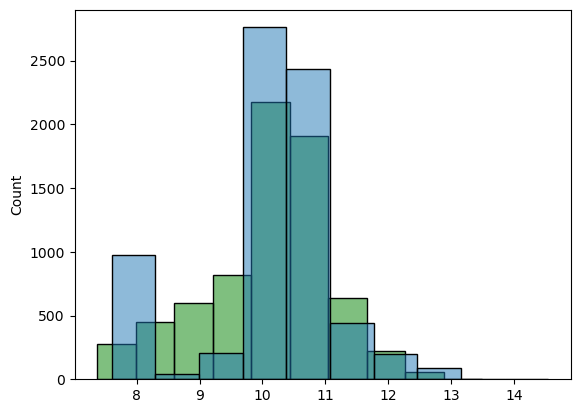

In [104]:
sns.histplot(y_pred, color='green', bins=10, alpha=0.5)
sns.histplot(y_train, bins=10, alpha=0.5)

In [105]:
#done with 2.8
#sidebar - validating results with linear regression from scikit learn/]

In [106]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)



LinearRegression()

In [107]:
print('coefficients', model.coef_)

print('intercept/', model.intercept_)

coefficients [ 9.43209513e-02  3.80316024e-03  7.39013429e-02 -2.35246490e-02
 -2.85786636e-03  1.10921411e-02 -4.88810772e-05]
intercept/ -180.85289025205648


In [108]:
y_pred_lr = model.predict(x_train)

<AxesSubplot:ylabel='Count'>

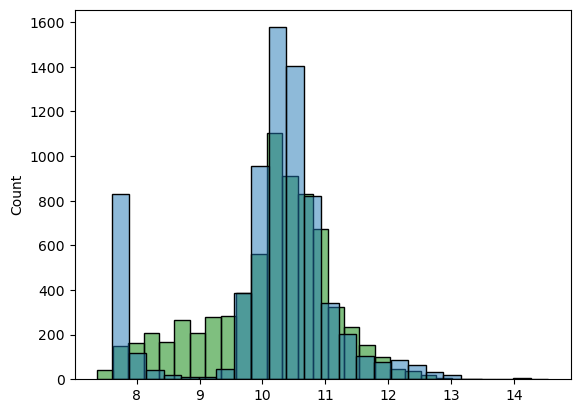

In [109]:
sns.histplot(y_pred_lr, color='green', bins=25, alpha=0.5)
sns.histplot(y_train, bins=25, alpha=0.5)

In [110]:
#recap - implemented normal equation to perform linear regression 

### 2.9 Evaluating Regression Models - RMSE

In [111]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [112]:
rmse(y_train, y_pred)

0.5171356682812338

#### 2.10 Validating the model 

In [113]:
base = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [114]:
#this function is used to pre process the data 

def prepare_X(df):
    df_num = df[base]
    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [115]:
#preparing the training data set
X_train = prepare_X(df_train)

#Instantiating the model from above
w0, w = train_linear_regression(X_train, y_train)

#prepping the validation dataset
X_val = prepare_X(df_val)

#preds for the validation set
y_pred = w0+ X_val.dot(w)


#evaluate quality of predictions
rmse(y_val, y_pred)

0.516823495145889

### 2.11 Feature engineering

In [116]:
def prepare_X(df):
    
    #creating a copy of the dataframe so that the OG dataframe isnt modified
    df = df.copy()
    
    #picking out just the numerical variables of interest
    df_num = df[base]
    
    #including a new variable to show age of car
    df_num['age'] = 2024 - df_train.year
    
    #filling in missing values with zero
    df_num = df_num.fillna(0)
    
    #converting dataframe into 
    X = df_num.values
    
    return X

In [117]:
X_train = prepare_X(df_train)

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [118]:
X_train

array([[2008.,  148.,    4., ...,   24., 1385.,   16.],
       [2012.,  132.,    4., ...,   25., 2031.,   12.],
       [2016.,  148.,    4., ...,   28.,  640.,    8.],
       ...,
       [2015.,  285.,    6., ...,   17.,  549.,    9.],
       [2014.,  563.,   12., ...,   13.,   86.,   10.],
       [2017.,  200.,    4., ...,   22.,  873.,    7.]])

In [119]:

#Instantiating the model from above
w0, w = train_linear_regression(X_train, y_train)

#prepping the validation dataset
X_val = prepare_X(df_val)

#preds for the validation set
y_pred = w0+ X_val.dot(w)


#evaluate quality of predictions
rmse(y_val, y_pred)

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


6.212722409717837

<AxesSubplot:ylabel='Count'>

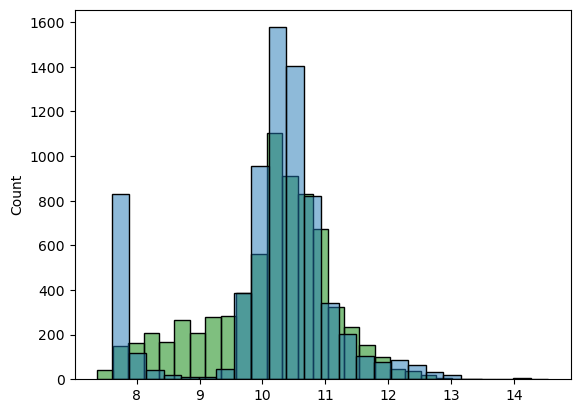

In [120]:
sns.histplot(y_pred_lr, color='green', bins=25, alpha=0.5)
sns.histplot(y_train, bins=25, alpha=0.5)

### 2.12 - thinking about how to use categorical variables here

In [121]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [122]:
cats = list(df_train.dtypes[df_train.dtypes =='object'].index)

cats.append('number_of_doors')

In [123]:
df_train[cats]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,number_of_doors
0,chevrolet,cobalt,regular_unleaded,manual,front_wheel_drive,NaN,compact,coupe,2.0
1,toyota,matrix,regular_unleaded,automatic,front_wheel_drive,hatchback,compact,4dr_hatchback,4.0
2,subaru,impreza,regular_unleaded,automatic,all_wheel_drive,hatchback,compact,4dr_hatchback,4.0
3,volkswagen,vanagon,regular_unleaded,manual,rear_wheel_drive,NaN,large,passenger_minivan,3.0
4,ford,f-150,flex-fuel_(unleaded/e85),automatic,four_wheel_drive,flex_fuel,large,crew_cab_pickup,4.0
...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,premium_unleaded_(required),automatic,rear_wheel_drive,"luxury,performance",midsize,convertible,2.0
7146,volkswagen,beetle,premium_unleaded_(recommended),automated_manual,front_wheel_drive,"hatchback,performance",compact,2dr_hatchback,2.0
7147,gmc,sierra_1500,flex-fuel_(unleaded/e85),automatic,four_wheel_drive,flex_fuel,large,extended_cab_pickup,4.0
7148,rolls-royce,ghost,premium_unleaded_(required),automatic,rear_wheel_drive,"exotic,luxury,performance",large,sedan,4.0


In [124]:
#typical way of encoding - one hot?

In [125]:
#one hot encoding the variable number of doors in df_train

for i in [2,3,4]:
    df_train['num_doors_%s' % i] = (df_train.number_of_doors == i).astype('int')

In [126]:
# fill missing values with zero, include age, include a categorical encoding of number of doors



def prepare_X(df):
    
    #creating a copy of the dataframe so that the OG dataframe isnt modified
    df = df.copy()
    
    #picking out just the numerical variables of interest
    df_num = df[base]
    
    #one hot encoding the variable of interest - number_of_doors
    for i in [2,3,4]:
        df_num['num_doors_%s' %i] = (df_num.number_of_doors==i).astype('int')
    
    #including a new variable to show age of car
    df_num['age'] = 2024 - df_train.year
    
    #filling in missing values with zero
    df_num = df_num.fillna(0)
    
    #converting dataframe into 
    X = df_num.values
    
    return X

In [127]:
X_train = prepare_X(df_train)

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [128]:

#Instantiating the model from above
w0, w = train_linear_regression(X_train, y_train)

#prepping the validation dataset
X_val = prepare_X(df_val)

#preds for the validation set
y_pred = w0+ X_val.dot(w)


#evaluate quality of predictions
rmse(y_val, y_pred)

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


336.0503124175685

In [129]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [130]:
top5_makes = list(df['make'].value_counts().head(5).index)

#### One way to encode categorical variables with too many categories (>5) could be to group them and create fewer categories
#### I probably should check the behavior of key variables within those new categories. If they happen to be the same, it might
#### not make too much sense to have those as separate categories.

In [131]:
#updating the prep function to take into account the top 5 makes 

def prepare_X(df):
    
    # 1 -- creating a copy of the dataframe so that the OG dataframe isnt modified
    df = df.copy()
    
    # 2 -- picking out just the numerical variables of interest
    df_num = df[base]
    
    # 3 -- one hot encoding the variable of interest - number_of_doors
    for i in [2,3,4]:
        df_num['num_doors_%s' %i] = (df_num.number_of_doors==i).astype('int')
    
    #one hot encoding the variable of interest - makesw
    for i in makes:
        df_num['num_doors_%s' %i] = (df_num.number_of_doors==i).astype('int')
    
    
    #including a new variable to show age of car
    df_num['age'] = 2024 - df_train.year
    
    #filling in missing values with zero
    df_num = df_num.fillna(0)
    
    #converting dataframe into 
    X = df_num.values
    
    return X


In [132]:
cats

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'number_of_doors']

In [133]:
for i in cats:
    categories[i] = df[i].value_counts().head().index

NameError: name 'categories' is not defined

In [ ]:
categories = {}
for i in cats:
    categories[i] = df[i].value_counts().head().index

In [ ]:
categories

In [ ]:
df['model'].value_counts().head().index

In [ ]:
#updating the prep function to take into account the top 5 makes 

def prepare_X(df):
    
    # 1 -- creating a copy of the dataframe so that the OG dataframe isnt modified
    df = df.copy()
    
    # 2 -- picking out just the numerical variables of interest
    df_num = df[base]
    
    #including a new variable to show age of car
    df_num['age'] = 2024 - df_train.year
    
    #filling in missing values with zero
    df_num = df_num.fillna(0)
    
    for key, values in categories.items():
        for i in values:
            df_num['%s_%s' %(key,values)] = (df_num[key] == values.astype('int'))
    
    #converting dataframe into values
    X = df_num.values
    
    return df_num

In [ ]:
#updating the prep function to take into account the top 5 makes 

def prepare_X_test(df):
    
    # 1 -- creating a copy of the dataframe so that the OG dataframe isnt modified
    df = df.copy()
    
    # 2 -- picking out just the numerical variables of interest
    df_num = df[cats]
    
    for key, values in categories.items():
        for i in values:
            df_num['%s_%s' %(key,values)] = (df_num[key] == values).astype('int')
    
    #converting dataframe into values
    X = df_num.values
    
    return df_num

In [ ]:
df[cats]

In [ ]:
#Identifying the list of variables that are categories

categories_list = list(df.dtypes[df.dtypes == "object"].index)


#Identifying the top 5 categories within each of the above shortlisted categorical variables


categories_v2={} #create an empty dictionary to store the category names (key) and the top 5 categories (values)

for i in categories_list:
    categories_v2[i] = df[categories_list].value_counts().head()
    

def prepare_X_v2(x):
    for k, v in categories_v2.items(): # for each key, value pair
        for v in values: #for each value within each category, we are creating a integer boolean variable and naming the 
            #column as such
            x['%s_%s' % (k,v)] = (x[k]==v).astype('int')
            
    return x


In [ ]:
#continue from 2.13 Regularization

In [143]:
#creating a list of categorical variable names from the dataframe
cat_var_names = list(df.dtypes[df.dtypes=='object'].index)

In [149]:
df[cat_var_names].value_counts().head().index

MultiIndex([(    'subaru',     'b9_tribeca', ...),
            (      'ford',          'f-150', ...),
            ('volkswagen',         'beetle', ...),
            ( 'chevrolet', 'silverado_1500', ...),
            (     'honda',          'pilot', ...)],
           names=['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'])

In [150]:
categorical = {}

for i in cat_var_names:
    categorical[i] = df[i].value_counts().head().index

In [154]:
categorical.items()

dict_items([('make', Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object')), ('model', Index(['silverado_1500', 'tundra', 'f-150', 'sierra_1500',
       'beetle_convertible'],
      dtype='object')), ('engine_fuel_type', Index(['regular_unleaded', 'premium_unleaded_(required)',
       'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel'],
      dtype='object')), ('transmission_type', Index(['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown'], dtype='object')), ('driven_wheels', Index(['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive',
       'four_wheel_drive'],
      dtype='object')), ('market_category', Index(['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback'], dtype='object')), ('vehicle_size', Index(['compact', 'midsize', 'large'], dtype='object')), ('vehicle_style', Index(['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'], dtype='object'))])

In [167]:
def prepare_x(df):
    
    df = df.copy() #create a copy of the dataset to avoid the OG dataframe being messed with
    
    df['age'] = 2024 - df['year'] #including a new column 'age'
    features = base + ['age']
    
    for x in [2,3,4]:
        df['num_doors_%d' % x] = (df.number_of_doors == x).astype(int) #one-hot encoding the number of doors variable
        features.append('num_doors_%d' % x)
        
    for keys, values in categorical.items():
        for value in values:
            df['%s_%s' %(keys, value)] = (df[keys]==value).astype(int)
            features.append("%s_%s" %(keys, value))
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [168]:
X_train = prepare_x(df_train)

In [170]:
X_train

w0, w = train_linear_regression(X_train, y_train)

In [171]:
X_val = prepare_x(df_val)
y_pred = w0 + np.dot(X_val, w)

rmse(y_pred, y_val)

68.07838124001293

In [ ]:
#taking a break 
#continue from around minute 5:00 tomorrow in 2.13 - Regularization :)